In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = symbols('t', real=True)
    return (integrate(f*conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

# Function to Approximate

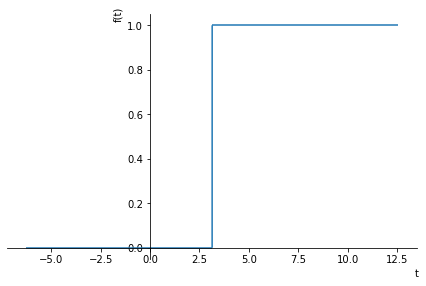

In [2]:
t = symbols('t', real=True)
f1 = Piecewise(
    (0, t < pi),   # t is zero before time pi
    (1, True)    # otherwise, t is 1
)
plot(f1, (t, -2*pi, 4*pi))

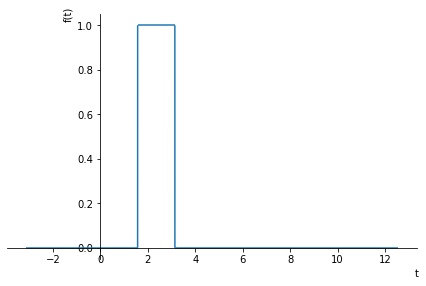

In [3]:
f2 = Piecewise(
    (0, t < pi/2),   # t is zero before time pi
    (1, t < pi),      # otherwise, t is 1
    (0, True)      # otherwise, t is 1
)
plot(f2, (t, -pi, 4*pi))

In [12]:
f = f2 # choose function to evaluate

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [13]:
k = symbols('k', real=True, integer=True)
psi_k = exp(-I*k*t)
tau = 2*pi

ak = L2_coefficient(f, psi_k, tau)

In [14]:
# this is just a fancy way to make sympy print the left hand side of the equation "a_k = "
# otherwise if will just print the right hand side

Eq(symbols('\psi_k'), psi_k)

Eq(\psi_k, exp(-I*k*t))

In [15]:
Eq(symbols('a_k'), ak)

Eq(a_k, Piecewise((I*((-1)**(k + 1) + exp(I*pi*k/2))/(2*pi*k), Ne(k, 0)), (1/4, True)))

$approx = a_0*\psi_0 + a_1*\psi_1 + a_{-1}*\psi_{-1} + \ldots$

In [20]:
n = 10  # onto basis functions psi_{-10} ... psi_{10}
start = -2*pi
stop = 4*pi

approx = 0
for k_i in range(-n, n+1):
    approx += (ak*psi_k).subs(k, k_i)

Eq(symbols('approx'), approx)

Eq(approx, I*exp(10*I*t)/(10*pi) - I*(1 - I)*exp(9*I*t)/(18*pi) - I*(1 + I)*exp(7*I*t)/(14*pi) + I*exp(6*I*t)/(6*pi) - I*(1 - I)*exp(5*I*t)/(10*pi) - I*(1 + I)*exp(3*I*t)/(6*pi) + I*exp(2*I*t)/(2*pi) - I*(1 - I)*exp(I*t)/(2*pi) + 1/4 + I*(1 + I)*exp(-I*t)/(2*pi) - I*exp(-2*I*t)/(2*pi) + I*(1 - I)*exp(-3*I*t)/(6*pi) + I*(1 + I)*exp(-5*I*t)/(10*pi) - I*exp(-6*I*t)/(6*pi) + I*(1 - I)*exp(-7*I*t)/(14*pi) + I*(1 + I)*exp(-9*I*t)/(18*pi) - I*exp(-10*I*t)/(10*pi))

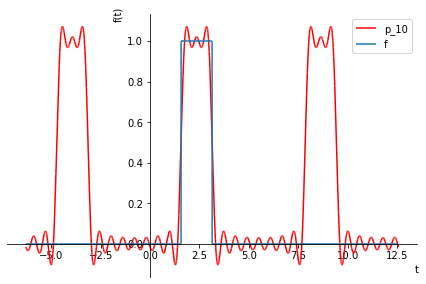

In [21]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

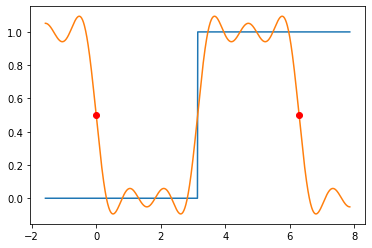

In [11]:
def do_plot():
    # how to convert symbolic functions into numerical functions
    f_func = lambdify(t, f)
    approx_func = lambdify(t, approx)
    
    # generate data
    t_vals = np.linspace(-0.5*np.pi, 2.5*np.pi, 1000)
    f_vals = f_func(t_vals)
    
    approx_vals =  np.real(approx_func(t_vals))
    plt.plot(t_vals, f_vals)
    plt.plot(t_vals, approx_vals)
    
    
    plt.plot(0*tau, 0.5, 'ro')
    plt.plot(tau, 0.5, 'ro')

do_plot()

In [49]:
approx

-I*exp(5*I*t)/(5*pi) - I*exp(3*I*t)/(3*pi) - I*exp(I*t)/pi + 1/2 + I*exp(-I*t)/pi + I*exp(-3*I*t)/(3*pi) + I*exp(-5*I*t)/(5*pi)

In [9]:
approx.expand(complex=True)

2*sin(t)/pi + 2*sin(3*t)/(3*pi) + 2*sin(5*t)/(5*pi) + 1/2

# Power Spectrum

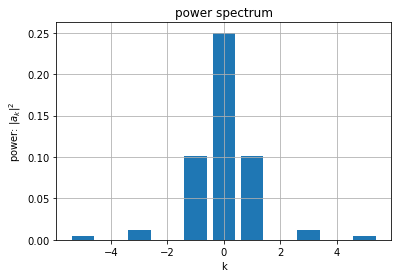

In [188]:
# there isn't a great way to do scatter plots in sympy, so we will plot our 
# power spectrum using the matplotlib library, imported at the top of this
# notebook
k_values = range(-n, n+1)
power = abs(ak)**2

# this is building a list of power values evaluating the function
# using list comprehension, a short way to write for loops
# https://www.programiz.com/python-programming/list-comprehension
power_values = [ power.subs(k, ki) for ki in k_values]
plt.bar(k_values, power_values)
plt.xlabel('k')
plt.ylabel('power: $|a_k|^2$')
plt.title('power spectrum')
plt.grid()

<BarContainer object of 11 artists>

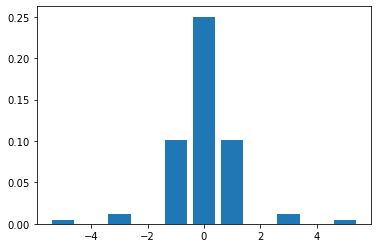

In [184]:
plt.bar(k_values, power_values)


# Using $\{1, \cos(2\pi k t/\tau), \sin(2\pi k t/\tau\}$ as Basis

In [120]:
psi_1k = cos(k*t*2*pi/tau)
Eq(symbols('\psi_1k'), psi_1k)

Eq(\psi_1k, cos(k*t))

In [121]:
alpha_k = L2_coefficient(f, psi_1k, tau)
Eq(symbols('alpha_k'), alpha_k)

Eq(alpha_k, Piecewise((0, Ne(k, 0)), (1/2, True)))

In [122]:
psi_2k = sin(k*t*2*pi/tau)
Eq(symbols('\psi_2k'), psi_2k)

Eq(\psi_2k, sin(k*t))

In [123]:
beta_k = L2_coefficient(f, psi_2k, tau)
Eq(symbols('beta_k'), beta_k)

Eq(beta_k, Piecewise(((1 - (-1)**k)/(pi*k), Ne(k, 0)), (nan, True)))

In [124]:
psi_1 = 1
a_0 = L2_coefficient(f, psi_1, tau)
Eq(symbols('a_0'), a_0)

Eq(a_0, 1/2)

In [127]:
approx = a_0
for k_i in range(1, n+1):
    approx += (alpha_k*psi_1k + beta_k*psi_2k).subs(k, k_i)
    print(approx)

2*sin(t)/pi + 1/2
2*sin(t)/pi + 1/2
2*sin(t)/pi + 2*sin(3*t)/(3*pi) + 1/2
2*sin(t)/pi + 2*sin(3*t)/(3*pi) + 1/2
2*sin(t)/pi + 2*sin(3*t)/(3*pi) + 2*sin(5*t)/(5*pi) + 1/2


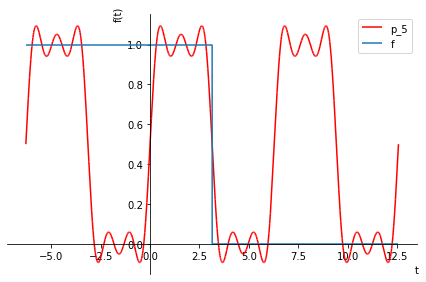

In [126]:
fig = plot(approx, f, (t, start, stop), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

In [93]:
approx

2*sin(t)/pi + 2*sin(3*t)/(3*pi) + 2*sin(5*t)/(5*pi) + 2*sin(7*t)/(7*pi) + 2*sin(9*t)/(9*pi) + 1/2